In [47]:
!pip install pmdarima
!pip install seaborn
!pip install nbconvert[webpdf]

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
from datetime import datetime


   ---------------------------------------- 0.0/29.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/29.4 MB 991.0 kB/s eta 0:00:30
    --------------------------------------- 0.4/29.4 MB 5.3 MB/s eta 0:00:06
   - -------------------------------------- 1.4/29.4 MB 10.8 MB/s eta 0:00:03
   -- ------------------------------------- 1.6/29.4 MB 12.5 MB/s eta 0:00:03
   -- ------------------------------------- 1.8/29.4 MB 8.9 MB/s eta 0:00:04
   --- ------------------------------------ 2.4/29.4 MB 10.1 MB/s eta 0:00:03
   --- ------------------------------------ 2.4/29.4 MB 8.6 MB/s eta 0:00:04
   --- ------------------------------------ 2.9/29.4 MB 8.9 MB/s eta 0:00:03
   --- ------------------------------------ 2.9/29.4 MB 8.9 MB/s eta 0:00:03
   ---- ----------------------------------- 3.0/29.4 MB 8.0 MB/s eta 0:00:04
   ---- ----------------------------------- 3.6/29.4 MB 8.2 MB/s eta 0:00:04
   ----- ---------------------------------- 3.8/29.4 MB 7.6 MB/s eta 0:00:04
 

In [27]:
#Loading the data

data = pd.read_csv("C:/Users/tarun/OneDrive/Desktop/python project/Walmart Data Analysis and Forcasting.csv")
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [28]:
data.shape  #8 columns and 6435 rows

(6435, 8)

In [29]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [30]:
# Checking for Missing Values

missing_values = data.isnull().sum()
#missing_values           # so zero missing values

In [31]:
#convert date to datetimeformat

date_string = data['Date']
formatted_date = pd.to_datetime(date_string, format= "%d-%m-%Y")
data['Date'] = formatted_date # formatted_date

In [32]:
# Extract relevant date-time features

data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [33]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DayOfWeek,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,2010


In [34]:
#Ranking stores in descending order of weekly sales totals

data[['Store','Weekly_Sales']].groupby(['Store'],as_index=True).mean().sort_values(by='Weekly_Sales',ascending=False)
#data1

,Weekly_Sales
Store,
20,2.107677e+06
4,2.094713e+06
14,2.020978e+06
13,2.003620e+06
2,1.925751e+06
10,1.899425e+06
27,1.775216e+06
6,1.564728e+06
1,1.555264e+06


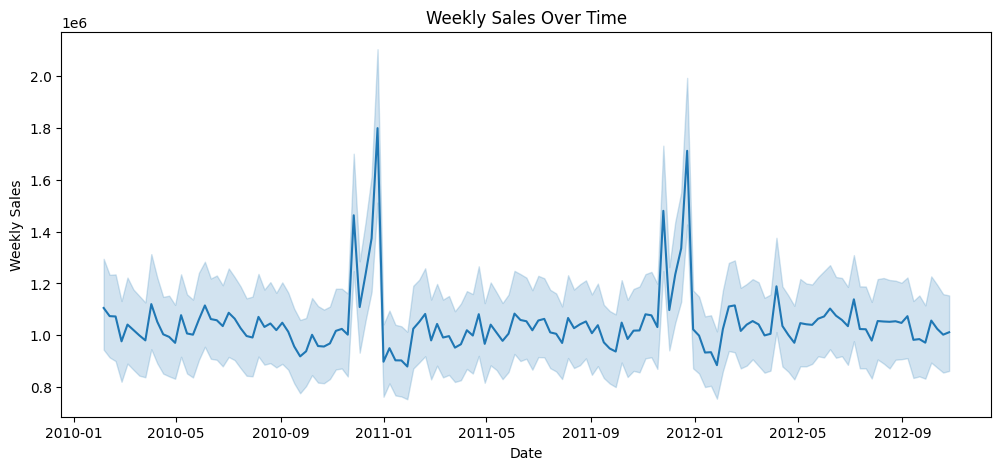

In [49]:
#Visualize weekly sales trends over time

plt.figure(figsize=(12,5))
sns.lineplot(x='Date', y='Weekly_Sales', data=data)
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

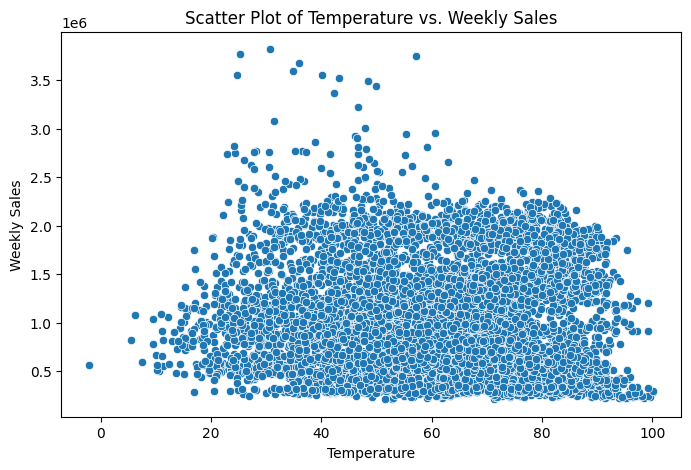

In [36]:
# Temperature and Sales Relationship

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data)
plt.title('Scatter Plot of Temperature vs. Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

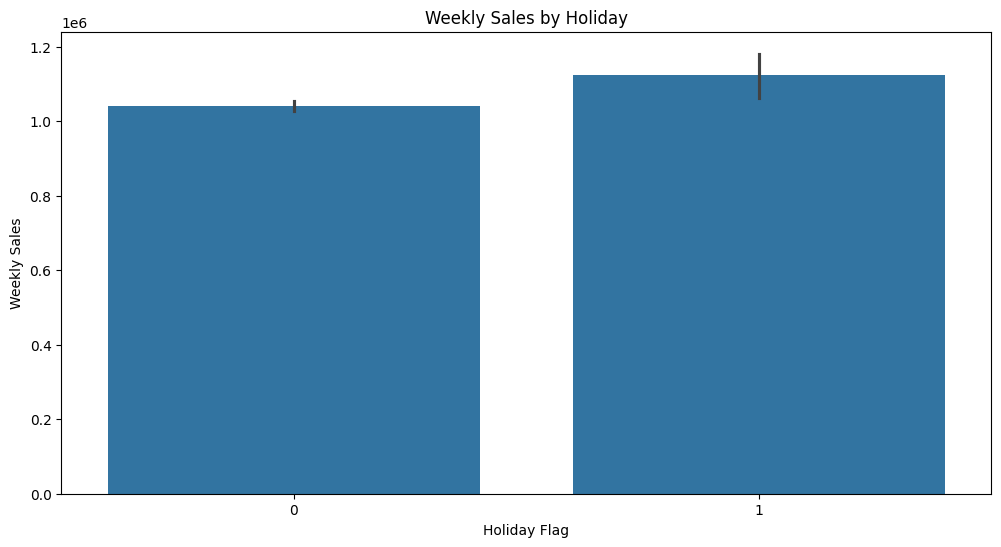

In [37]:
# Holiday Analysis

plt.figure(figsize=(12, 6))
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=data)
plt.title('Weekly Sales by Holiday')
plt.xlabel('Holiday Flag')
plt.ylabel('Weekly Sales')
plt.show()

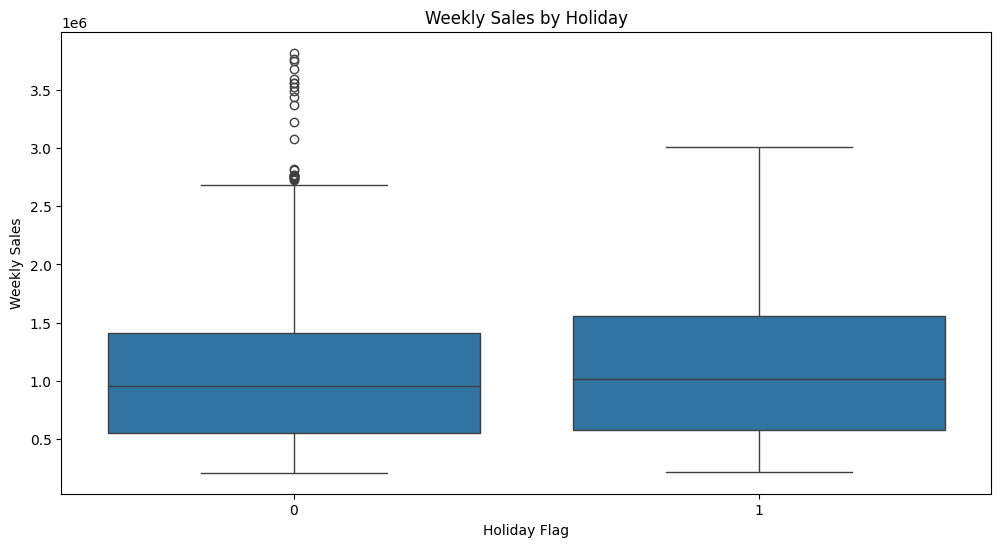

In [38]:
#Holiday Analysis

plt.figure(figsize=(12, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=data)
plt.title('Weekly Sales by Holiday')
plt.xlabel('Holiday Flag')
plt.ylabel('Weekly Sales')
plt.show()

<Axes: xlabel='Month'>

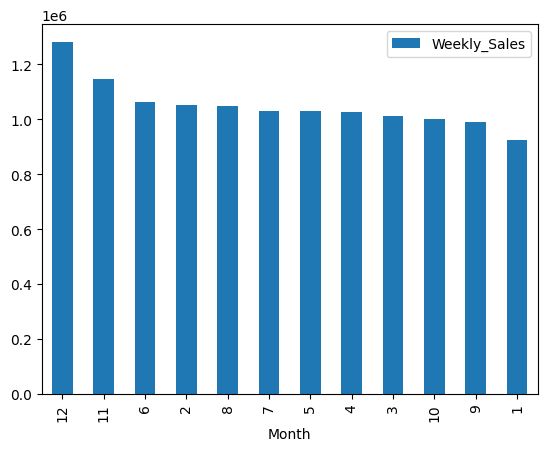

In [39]:
data[['Month','Weekly_Sales']].groupby(['Month'],as_index=True).mean().sort_values(by='Weekly_Sales',ascending=False).plot.bar()

In [40]:
data[['Year','Weekly_Sales']].groupby(['Year'],as_index=True).mean().sort_values(by='Weekly_Sales',ascending=False)#.plot.bar()

,Weekly_Sales
Year,
2010,1.059670e+06
2011,1.046239e+06
2012,1.033660e+06


In [41]:
data[['Year','CPI']].groupby(['Year'],as_index=True).mean().sort_values(by='CPI',ascending=False)

,CPI
Year,
2012,175.498781
2011,171.545716
2010,168.101782


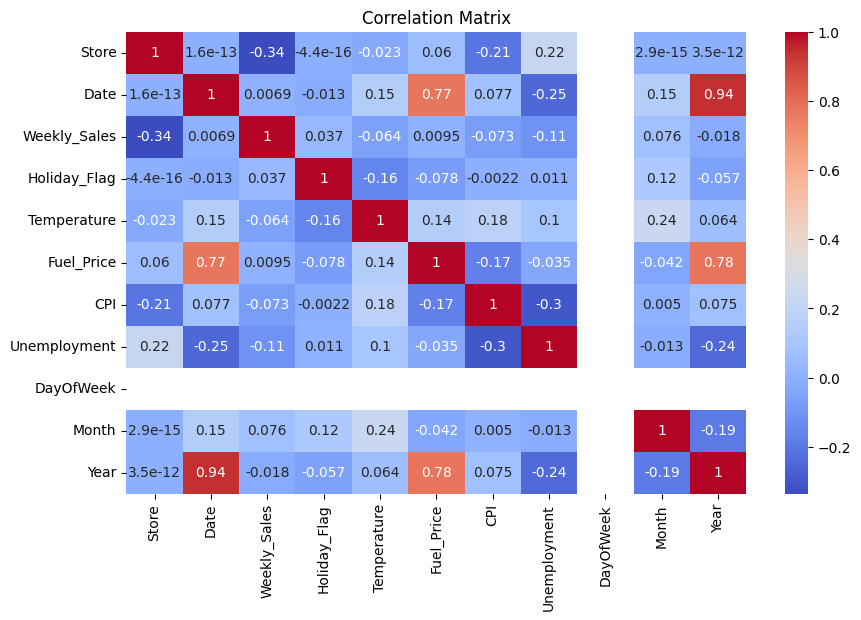

In [43]:
#Correlation Matrix

correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [44]:
#visualize the underlying components of the time series, including trend, seasonality, and residual.

decomposition = seasonal_decompose(data['Weekly_Sales'], period=7)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

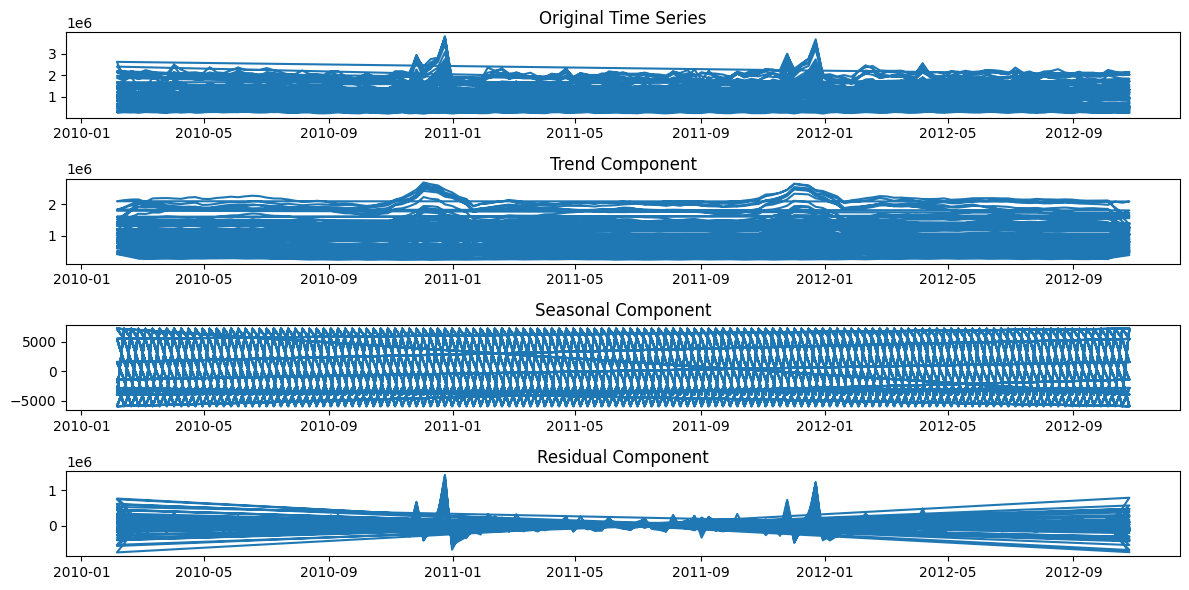

In [45]:
plt.figure(figsize=(12, 6))
plt.subplot(411)
plt.plot(data['Date'], data['Weekly_Sales'], label='Original')
plt.title('Original Time Series')
plt.subplot(412)
plt.plot(data['Date'], trend, label='Trend')
plt.title('Trend Component')
plt.subplot(413)
plt.plot(data['Date'], seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.subplot(414)
plt.plot(data['Date'], residual, label='Residual')
plt.title('Residual Component')
plt.tight_layout()
plt.show()